In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2
from utils import *
from MLP_WGAN import MLP_WGAN
from DCGAN import DC_WGAN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=[])
train_set = mnist.train.images

print(train_set.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 28, 28, 1)


## Training

### Defining Parameters

In [37]:
mb_size = 64
z_dim = 100
n_fig= 16
n_disc = 5
train_epoch = 3000
penalty = 10
x_dim = train_set.shape[1]
color = train_set.shape[3]

### DCGAN architecture
Training and saving the model

In [16]:
out_dir = 'out_DCGAN'
mnist_train_dcgan = DC_WGAN(train_set, mb_size, train_epoch, x_dim, z_dim, n_fig, out_dir, color, penalty, n_disc)
history_dcgan=mnist_train_dcgan.training()

(?, 28, 28, 1)
Iter: 0; D loss: -33.48; G_loss: 31.13
Iter: 1; D loss: -28.04; G_loss: 67.64
Iter: 2; D loss: -17.17; G_loss: 80.83
Iter: 3; D loss: -31.24; G_loss: 97.5
Iter: 4; D loss: 0.8207; G_loss: 108.8
Iter: 5; D loss: -6.101; G_loss: 107.9
Iter: 6; D loss: -32.72; G_loss: 125.1
Iter: 7; D loss: -31.12; G_loss: 119.9
Iter: 8; D loss: -35.1; G_loss: 123.2
Iter: 9; D loss: -24.45; G_loss: 123.5
Iter: 10; D loss: -20.83; G_loss: 137.5
Iter: 11; D loss: -17.69; G_loss: 147.2
Iter: 12; D loss: -15.63; G_loss: 135.2
Iter: 13; D loss: -20.62; G_loss: 156.7
Iter: 14; D loss: 31.44; G_loss: 173.8
Iter: 15; D loss: -18.45; G_loss: 148.8
Iter: 16; D loss: -22.24; G_loss: 147.8
Iter: 17; D loss: -13.67; G_loss: 162.8
Iter: 18; D loss: -22.08; G_loss: 158.3
Iter: 19; D loss: -23.18; G_loss: 168.3
Iter: 20; D loss: -17.77; G_loss: 179.7
Iter: 21; D loss: -21.33; G_loss: 163.8
Iter: 22; D loss: 8.605; G_loss: 170.5
Iter: 23; D loss: -14.24; G_loss: 176.7
Iter: 24; D loss: -15.28; G_loss: 176.0

## Plotting Losses

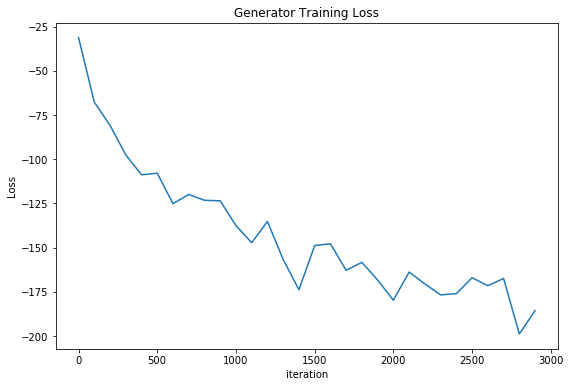

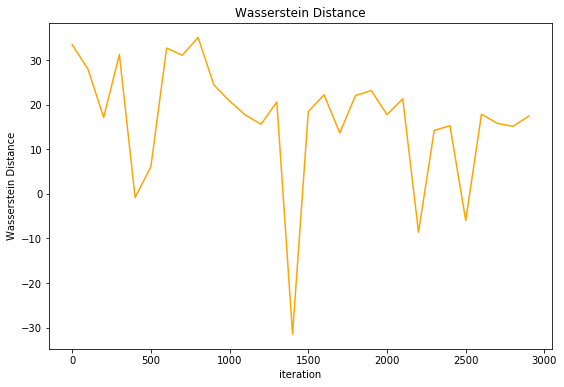

In [49]:
D , G=zip(*history_dcgan)

# generator
plt.figure(figsize=(9, 6))
plt.plot(range(0,3000,100), np.multiply(G, -1))
plt.title("Generator Training Loss")
plt.ylabel('Loss')
plt.xlabel('iteration')
plt.show()

# discriminator
plt.figure(figsize=(9, 6))
plt.plot(range(0,3000,100), np.multiply(D,-1), color='orange')
plt.title("Wasserstein Distance")
plt.ylabel('Wasserstein Distance')
plt.xlabel('iteration')
plt.show()

### Plotting Output
Plotting last 10 images

In [25]:
fileNames=[]
for root, dirs, files in os.walk(out_dir):
#     print(files)
    for filename in sorted(files):
         if os.path.splitext(filename)[1].lower() =='.png':
                print(root+'/'+filename)
                fileNames.append(root+'/'+filename)
          

out_DCGAN/000.png
out_DCGAN/001.png
out_DCGAN/002.png
out_DCGAN/003.png
out_DCGAN/004.png
out_DCGAN/005.png
out_DCGAN/006.png
out_DCGAN/007.png
out_DCGAN/008.png
out_DCGAN/009.png
out_DCGAN/010.png
out_DCGAN/011.png
out_DCGAN/012.png
out_DCGAN/013.png
out_DCGAN/014.png
out_DCGAN/015.png
out_DCGAN/016.png
out_DCGAN/017.png
out_DCGAN/018.png
out_DCGAN/019.png
out_DCGAN/020.png
out_DCGAN/021.png
out_DCGAN/022.png
out_DCGAN/023.png
out_DCGAN/024.png
out_DCGAN/025.png
out_DCGAN/026.png
out_DCGAN/027.png
out_DCGAN/028.png
out_DCGAN/029.png


out_DCGAN/029.png


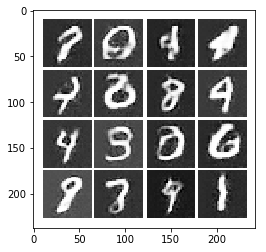

out_DCGAN/028.png


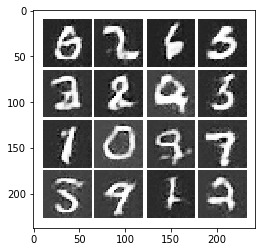

out_DCGAN/027.png


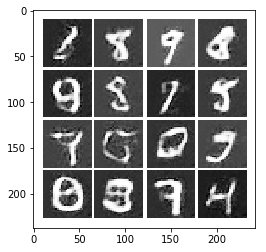

out_DCGAN/026.png


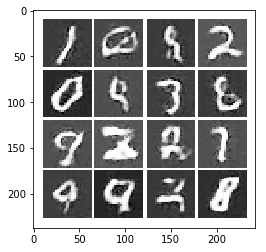

out_DCGAN/025.png


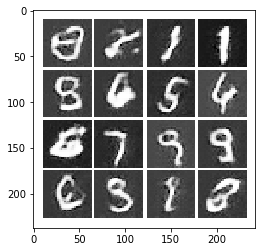

out_DCGAN/024.png


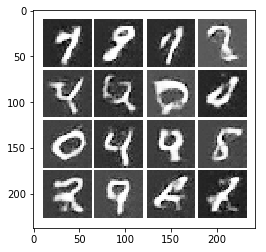

out_DCGAN/023.png


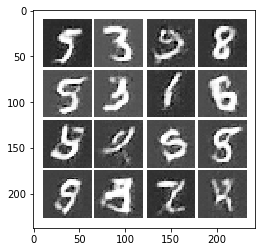

out_DCGAN/022.png


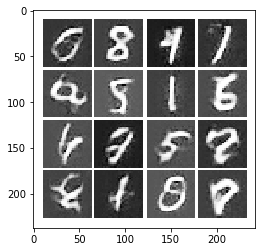

out_DCGAN/021.png


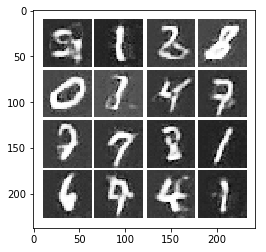

In [30]:
last_n=10
for i in range(-1, -last_n, -1):
    print(fileNames[i])
    img=mpimg.imread(fileNames[i])
    plt.imshow(img)
    plt.show()
    plt.close()

### Restoring Saved Models

Restoring models saved at every 100th iteration and generating a sample by passing same noise sample.

out_DCGAN/model/model_01
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_01


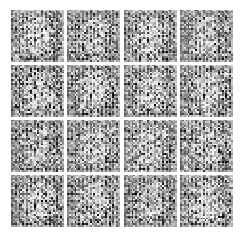

out_DCGAN/model/model_05
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_05


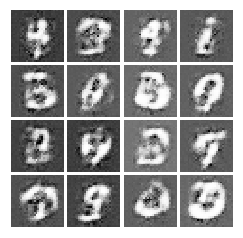

out_DCGAN/model/model_10
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_10


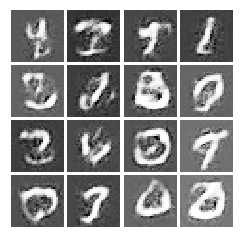

out_DCGAN/model/model_15
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_15


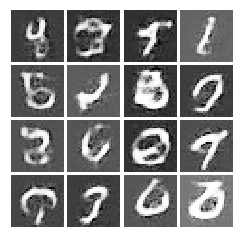

out_DCGAN/model/model_20
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_20


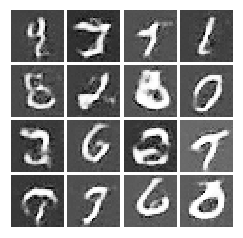

out_DCGAN/model/model_25
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_25


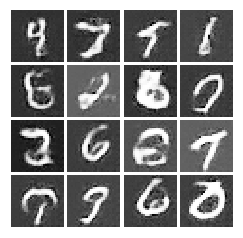

out_DCGAN/model/model_30
INFO:tensorflow:Restoring parameters from out_DCGAN/model/model_30


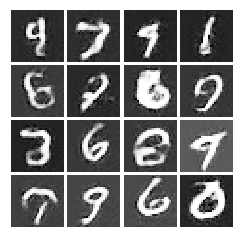

In [44]:
out_dir='out_DCGAN'
generateSamples(out_dir)

## MLP

In [38]:
out_dir = 'out_MLP'
mnist_train_mlp = MLP_WGAN(train_set, mb_size, train_epoch, x_dim, z_dim, n_fig, out_dir, color, penalty, n_disc)
history_mlp=mnist_train_mlp.training()

(?, 28, 28, 1)
Iter: 0; D loss: 2.454; G_loss: -0.6127
Iter: 1; D loss: -0.2749; G_loss: -5.159
Iter: 2; D loss: -0.6761; G_loss: 0.09726
Iter: 3; D loss: 0.06868; G_loss: 5.095
Iter: 4; D loss: 0.5456; G_loss: 3.306
Iter: 5; D loss: 3.567; G_loss: 1.689
Iter: 6; D loss: -1.142; G_loss: 0.5517
Iter: 7; D loss: -0.4835; G_loss: -2.627
Iter: 8; D loss: -6.606; G_loss: -4.255
Iter: 9; D loss: -9.724; G_loss: -7.7
Iter: 10; D loss: -12.18; G_loss: -9.643
Iter: 11; D loss: -14.99; G_loss: -12.1
Iter: 12; D loss: -13.09; G_loss: -13.03
Iter: 13; D loss: -18.69; G_loss: -12.95
Iter: 14; D loss: -14.38; G_loss: -15.86
Iter: 15; D loss: -12.92; G_loss: -16.98
Iter: 16; D loss: -15.5; G_loss: -19.97
Iter: 17; D loss: -13.75; G_loss: -20.41
Iter: 18; D loss: -14.09; G_loss: -19.69
Iter: 19; D loss: -12.19; G_loss: -20.36
Iter: 20; D loss: -15.21; G_loss: -20.76
Iter: 21; D loss: -12.87; G_loss: -19.78
Iter: 22; D loss: -12.62; G_loss: -22.12
Iter: 23; D loss: -11.8; G_loss: -22.09
Iter: 24; D los

### Plotting Loss

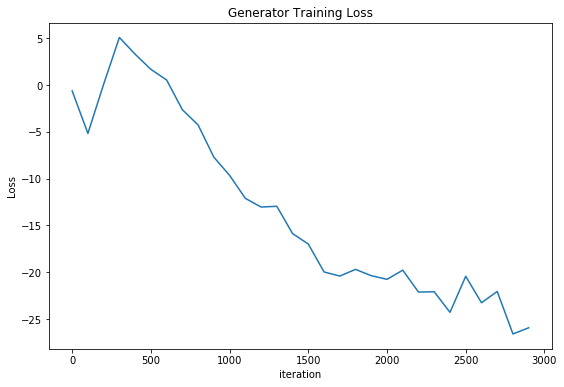

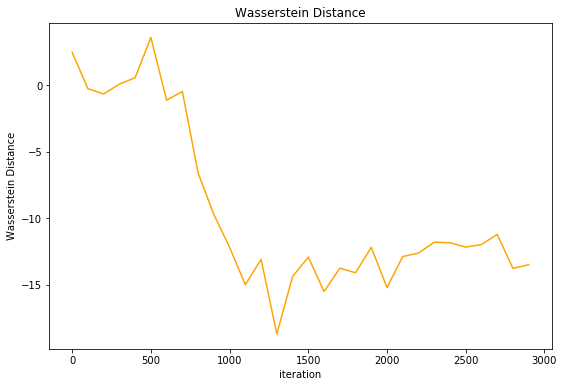

In [67]:
D , G=zip(*history_mlp)

# generator
plt.figure(figsize=(9, 6))
plt.plot(range(0,3000,100), G)
plt.title("Generator Training Loss")
plt.ylabel('Loss')
plt.xlabel('iteration')
plt.show()

# discriminator
plt.figure(figsize=(9, 6))
plt.plot(range(0,3000,100), D, color='orange')
plt.title("Wasserstein Distance")
plt.ylabel('Wasserstein Distance')
plt.xlabel('iteration')
plt.show()

### Plotting

In [41]:
fileNames=[]
for root, dirs, files in os.walk(out_dir):
    for filename in sorted(files):
        if os.path.splitext(filename)[1].lower() =='.png':
                print(root+'/'+filename)
                fileNames.append(root+'/'+filename)

out_MLP/000.png
out_MLP/001.png
out_MLP/002.png
out_MLP/003.png
out_MLP/004.png
out_MLP/005.png
out_MLP/006.png
out_MLP/007.png
out_MLP/008.png
out_MLP/009.png
out_MLP/010.png
out_MLP/011.png
out_MLP/012.png
out_MLP/013.png
out_MLP/014.png
out_MLP/015.png
out_MLP/016.png
out_MLP/017.png
out_MLP/018.png
out_MLP/019.png
out_MLP/020.png
out_MLP/021.png
out_MLP/022.png
out_MLP/023.png
out_MLP/024.png
out_MLP/025.png
out_MLP/026.png
out_MLP/027.png
out_MLP/028.png
out_MLP/029.png


out_MLP/029.png


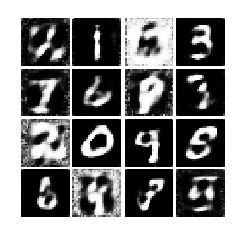

out_MLP/028.png


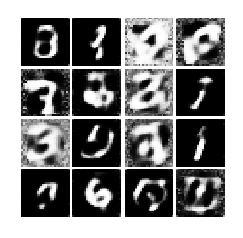

out_MLP/027.png


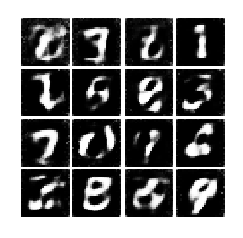

out_MLP/026.png


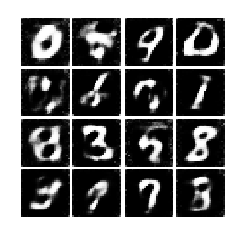

out_MLP/025.png


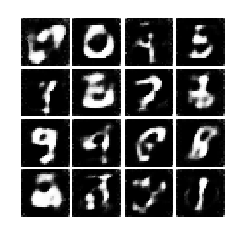

out_MLP/024.png


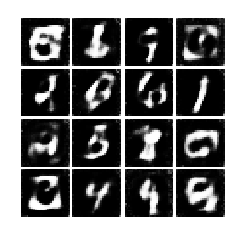

out_MLP/023.png


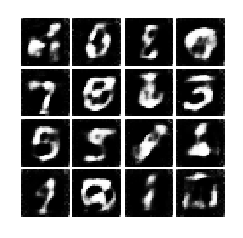

out_MLP/022.png


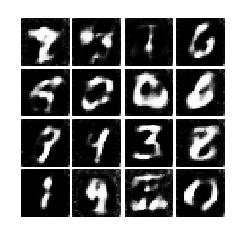

out_MLP/021.png


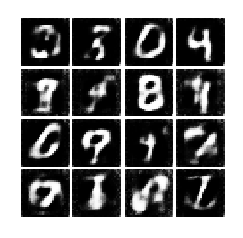

out_MLP/020.png


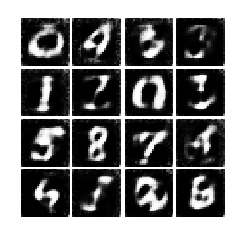

out_MLP/019.png


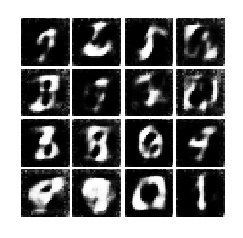

out_MLP/018.png


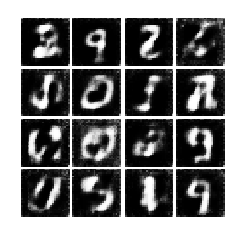

out_MLP/017.png


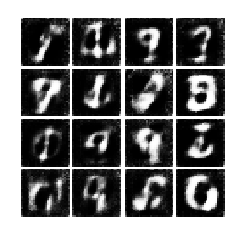

out_MLP/016.png


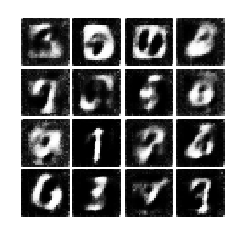

out_MLP/015.png


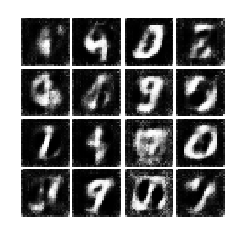

In [71]:
last_n=16
for i in range(-1, -last_n, -1):
    print(fileNames[i])
    img=mpimg.imread(fileNames[i])
    fig=plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.axis('off')
    plt.show()
    plt.close()

### Restoring Previous models

out_MLP/model/model_1
INFO:tensorflow:Restoring parameters from out_MLP/model/model_1


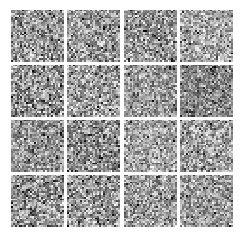

out_MLP/model/model_11
INFO:tensorflow:Restoring parameters from out_MLP/model/model_11


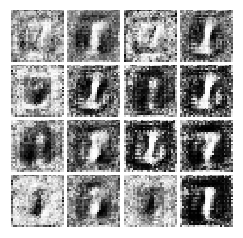

out_MLP/model/model_21
INFO:tensorflow:Restoring parameters from out_MLP/model/model_21


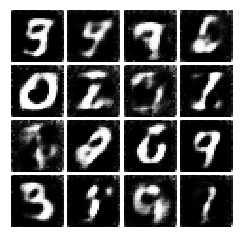

In [43]:
out_dir='out_MLP'
generateSamples(out_dir)